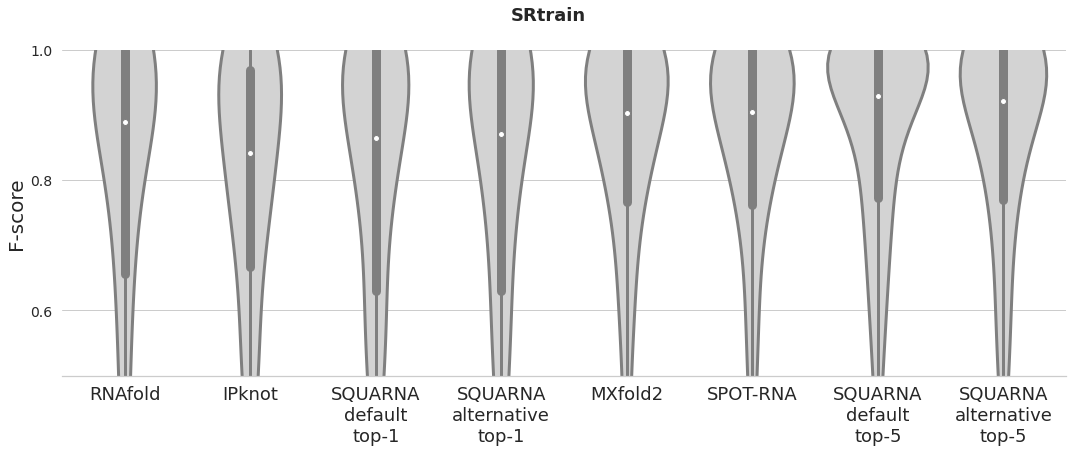

RNAfold RNAfold 1.0
RNAfold IPknot 0.7147486339315736
RNAfold SQUARNA 0.4706220796328947
RNAfold SQUARNAalt 0.7393698478461241
RNAfold MXfold2 0.003239669000687981
RNAfold SPOT-RNA 0.004278709011499459
RNAfold SQUARNA5 4.618423201882646e-06
RNAfold SQUARNAalt5 0.001277165634239691
IPknot RNAfold 0.7147486339315736
IPknot IPknot 1.0
IPknot SQUARNA 0.6987962004664451
IPknot SQUARNAalt 0.9799007228101061
IPknot MXfold2 0.005101720411147414
IPknot SPOT-RNA 0.006841927093003439
IPknot SQUARNA5 3.802114355159609e-06
IPknot SQUARNAalt5 0.001912760060230023
SQUARNA RNAfold 0.4706220796328947
SQUARNA IPknot 0.6987962004664451
SQUARNA SQUARNA 1.0
SQUARNA SQUARNAalt 0.6888021519481453
SQUARNA MXfold2 0.01724424496915953
SQUARNA SPOT-RNA 0.022069174562474474
SQUARNA SQUARNA5 3.0747286718905124e-05
SQUARNA SQUARNAalt5 0.007273086897759755
SQUARNAalt RNAfold 0.7393698478461241
SQUARNAalt IPknot 0.9799007228101061
SQUARNAalt SQUARNA 0.6888021519481453
SQUARNAalt SQUARNAalt 1.0
SQUARNAalt MXfold2 0.00

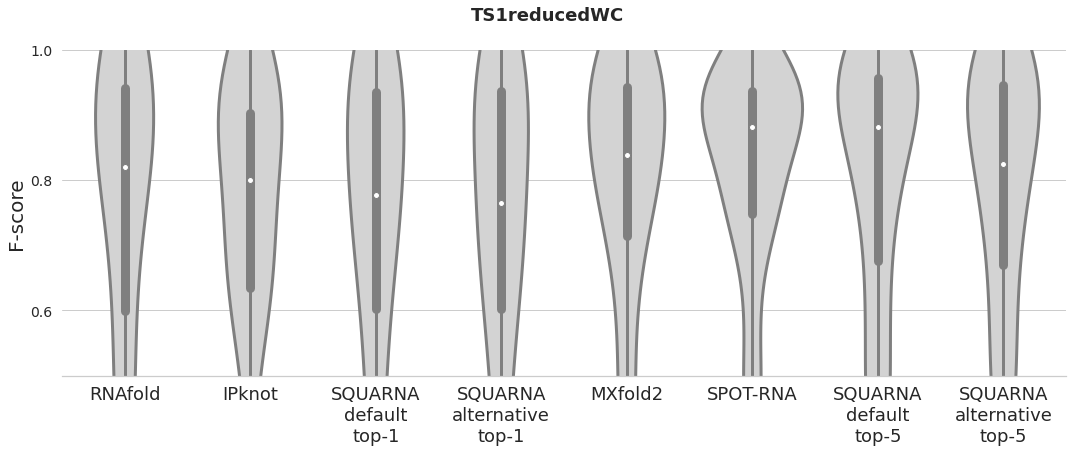

RNAfold RNAfold 1.0
RNAfold IPknot 0.7114118010975453
RNAfold SQUARNA 0.9464550887627303
RNAfold SQUARNAalt 0.8881999083177781
RNAfold MXfold2 0.1335344149726655
RNAfold SPOT-RNA 0.024724878464466225
RNAfold SQUARNA5 0.09675863666008636
RNAfold SQUARNAalt5 0.26251988654274366
IPknot RNAfold 0.7114118010975453
IPknot IPknot 1.0
IPknot SQUARNA 0.6435515130459506
IPknot SQUARNAalt 0.583751662512394
IPknot MXfold2 0.20303102240590437
IPknot SPOT-RNA 0.032095044874973076
IPknot SQUARNA5 0.14524352007872227
IPknot SQUARNAalt5 0.400100202686706
SQUARNA RNAfold 0.9464550887627303
SQUARNA IPknot 0.6435515130459506
SQUARNA SQUARNA 1.0
SQUARNA SQUARNAalt 0.9392703533738906
SQUARNA MXfold2 0.09730284743147469
SQUARNA SPOT-RNA 0.013596133478673483
SQUARNA SQUARNA5 0.06728176650752998
SQUARNA SQUARNAalt5 0.20939640430635714
SQUARNAalt RNAfold 0.8881999083177781
SQUARNAalt IPknot 0.583751662512394
SQUARNAalt SQUARNA 0.9392703533738906
SQUARNAalt SQUARNAalt 1.0
SQUARNAalt MXfold2 0.07872343192225262
S

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

for dataset in ("SRtrain","TS1reducedWC"):
    
    tools = "RNAfold IPknot SQUARNA SQUARNAalt MXfold2 SPOT-RNA SQUARNA5 SQUARNAalt5".split(' ')
    
    labels = ["RNAfold","IPknot", "SQUARNA\ndefault\ntop-1", 
              "SQUARNA\nalternative\ntop-1", 
              "MXfold2", "SPOT-RNA", 
              "SQUARNA\ndefault\ntop-5", 
              "SQUARNA\nalternative\ntop-5", ]
    
    res = {}
    
    for tool in tools:
        
        fscores = []
        
        with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines = tsv.readlines()
            title = lines[0].strip().split('\t')
            fsind = title.index("FS")
            for line in lines[1:]:
                fscores.append(float(line.strip().split('\t')[fsind]))
            
        res[tool] = fscores
    
    sns.set(style="whitegrid")

    df = pd.DataFrame(res)

    f, ax = plt.subplots(figsize=(18, 6))
    
    ax.set_ylim([0.5,1.0])

    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)

    sns.despine(left=True)

    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.6,0.8,1.0],labels=[0.6,0.8,1.0], size=14)
    
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools:
            statres = stats.ttest_ind(res[tool1], res[tool2])
            print(tool1, tool2,statres.pvalue)


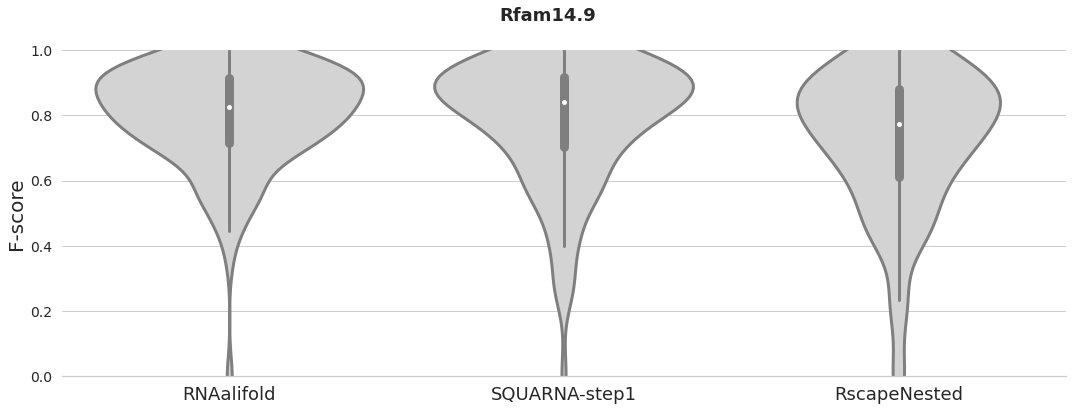

RNAalifold SQUARNAs1 0.40697617673532194
RNAalifold RscapeNested 0.0009558082411787955
SQUARNAs1 RscapeNested 0.01699694424864308

RNAalifold DEPTH -0.003 0.977


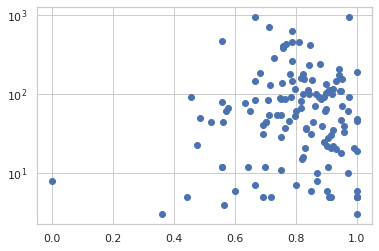

SQUARNAs1 DEPTH 0.236 0.006


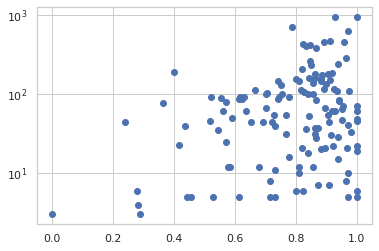

RscapeNested DEPTH 0.266 0.002


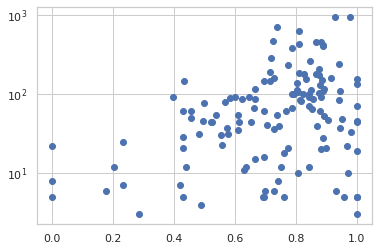

RNAalifold LENGTH -0.013 0.877


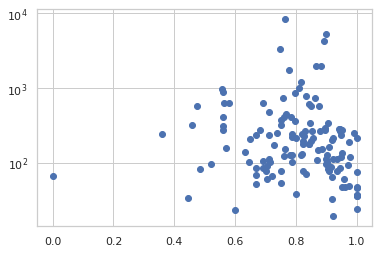

SQUARNAs1 LENGTH -0.164 0.058


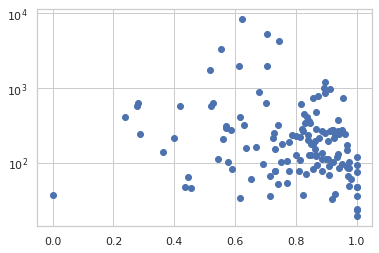

RscapeNested LENGTH -0.031 0.722


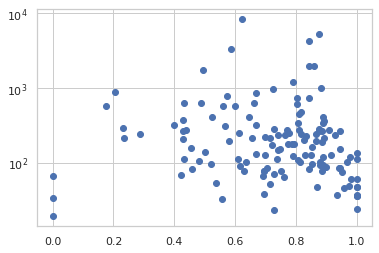

RNAalifold SQUARNAs1 DEPTH -0.219 0.011


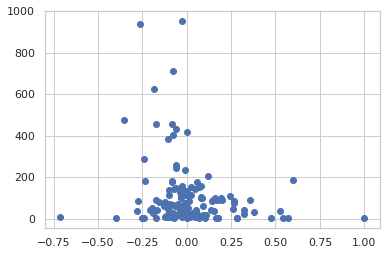

RNAalifold RscapeNested DEPTH -0.333 0.0


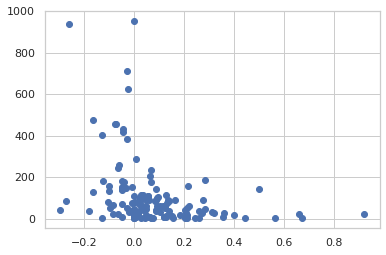

SQUARNAs1 RNAalifold DEPTH 0.219 0.011


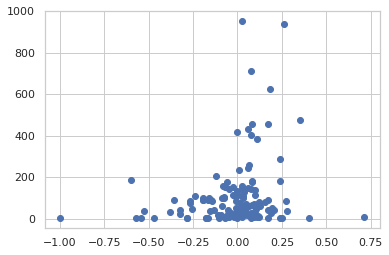

SQUARNAs1 RscapeNested DEPTH -0.06 0.492


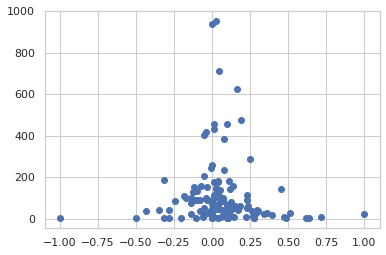

RscapeNested RNAalifold DEPTH 0.333 0.0


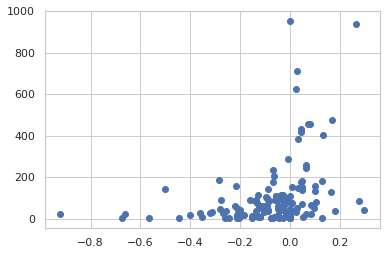

RscapeNested SQUARNAs1 DEPTH 0.06 0.492


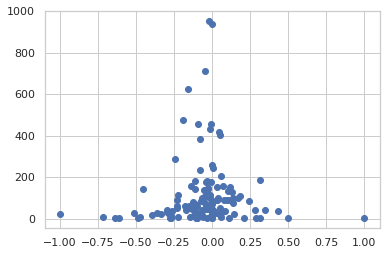

RNAalifold SQUARNAs1 LENGTH 0.141 0.104


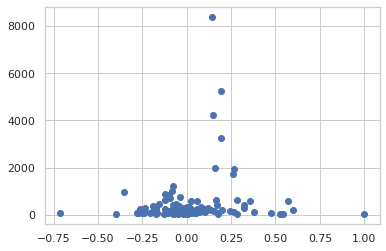

RNAalifold RscapeNested LENGTH 0.027 0.76


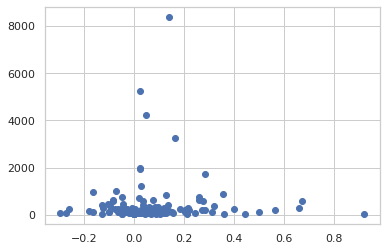

SQUARNAs1 RNAalifold LENGTH -0.141 0.104


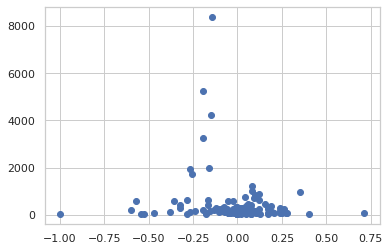

SQUARNAs1 RscapeNested LENGTH -0.107 0.22


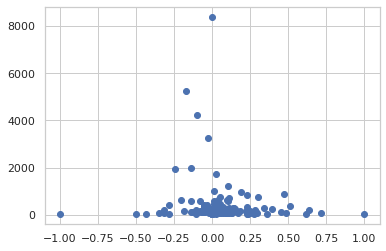

RscapeNested RNAalifold LENGTH -0.027 0.76


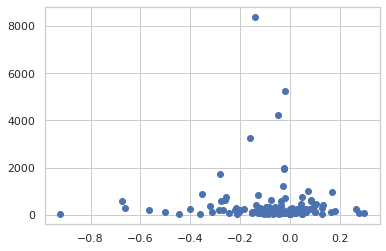

RscapeNested SQUARNAs1 LENGTH 0.107 0.22


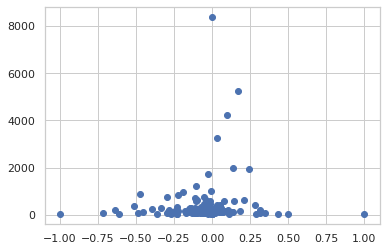

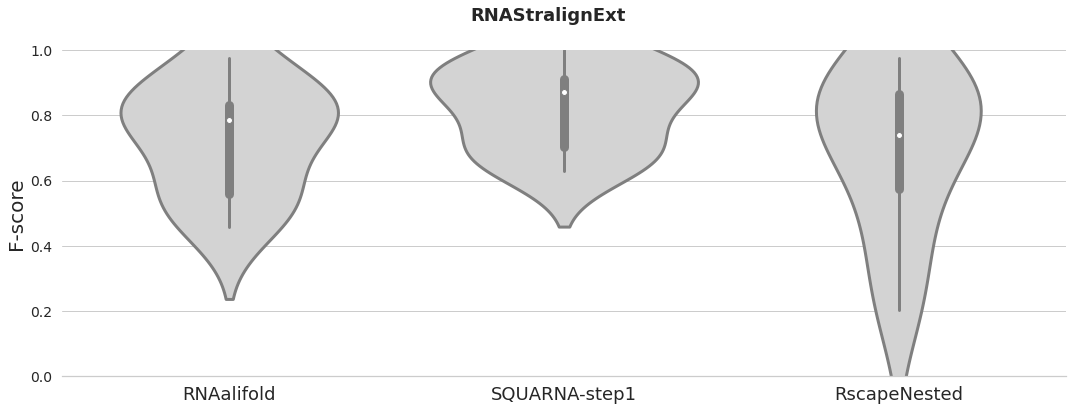

RNAalifold SQUARNAs1 0.19298261666184888
RNAalifold RscapeNested 0.706317712845652
SQUARNAs1 RscapeNested 0.16982214625856445

RNAalifold DEPTH 0.437 0.239


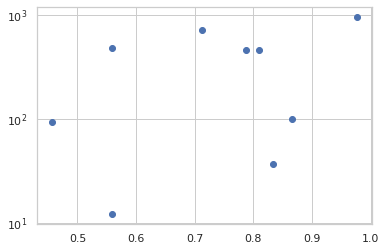

SQUARNAs1 DEPTH 0.689 0.04


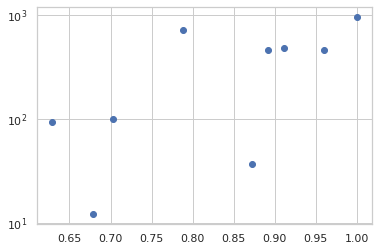

RscapeNested DEPTH 0.707 0.033


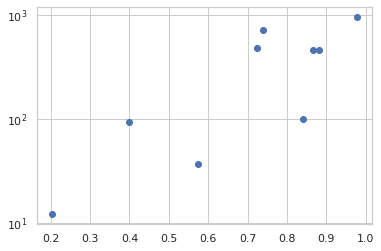

RNAalifold LENGTH 0.091 0.817


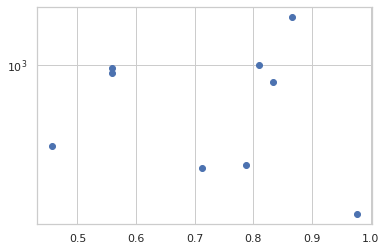

SQUARNAs1 LENGTH -0.339 0.372


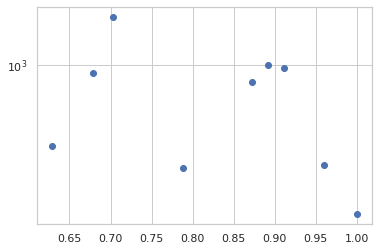

RscapeNested LENGTH -0.0 0.999


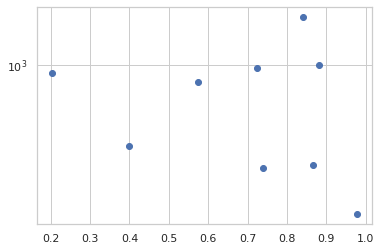

RNAalifold SQUARNAs1 DEPTH -0.117 0.764


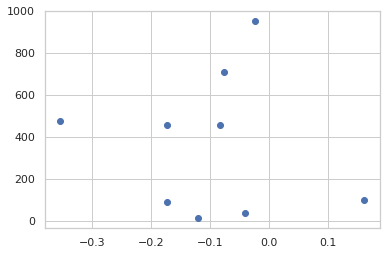

RNAalifold RscapeNested DEPTH -0.624 0.072


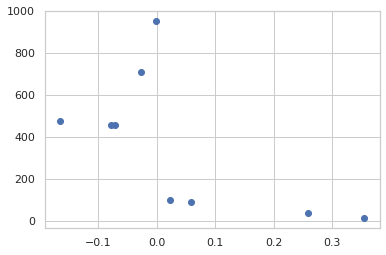

SQUARNAs1 RNAalifold DEPTH 0.117 0.764


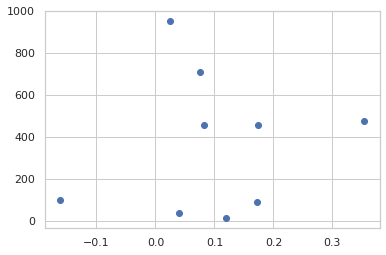

SQUARNAs1 RscapeNested DEPTH -0.482 0.189


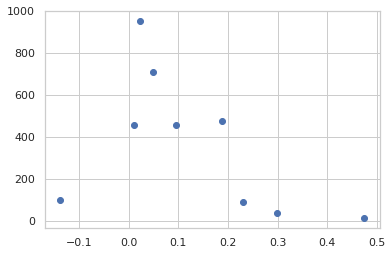

RscapeNested RNAalifold DEPTH 0.624 0.072


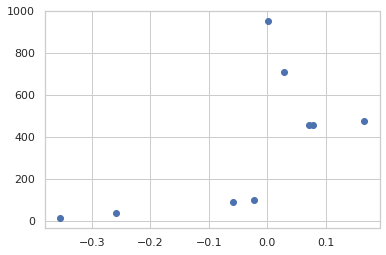

RscapeNested SQUARNAs1 DEPTH 0.482 0.189


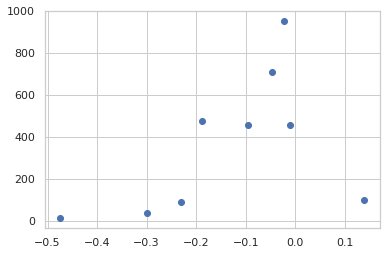

RNAalifold SQUARNAs1 LENGTH 0.434 0.244


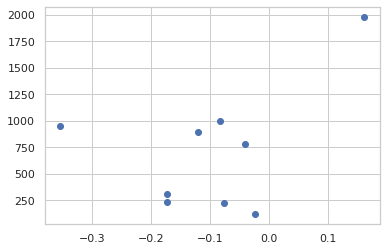

RNAalifold RscapeNested LENGTH 0.093 0.812


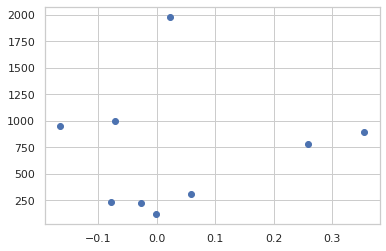

SQUARNAs1 RNAalifold LENGTH -0.434 0.244


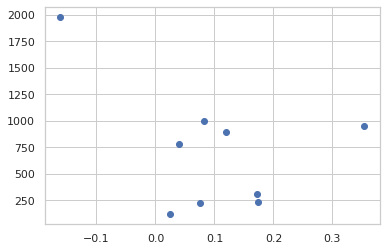

SQUARNAs1 RscapeNested LENGTH -0.245 0.526


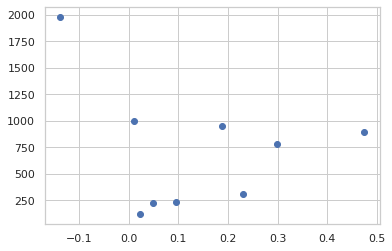

RscapeNested RNAalifold LENGTH -0.093 0.812


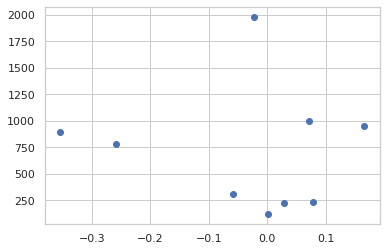

RscapeNested SQUARNAs1 LENGTH 0.245 0.526


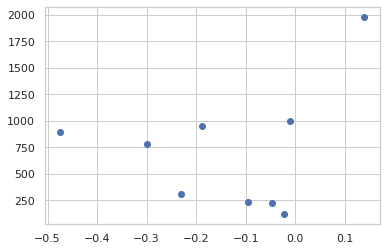

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

for dataset in ("Rfam14.9", "RNAStralignExt", "RfamPDB"):
    
    tools = "RNAalifold SQUARNAs1 RscapeNested".split(' ')
    
    labels = ["RNAalifold", "SQUARNA-step1",
              "RscapeNested"]
    
    #tools = "RNAalifold IPknot CentroidAlifold RscapeNested RscapeTotal SQUARNAs1 SQUARNAs2 SQUARNAs3i SQUARNAs3u".split(' ')
    
    #labels = ["RNAalifold","IPknot",
    #          "CentroidAlifold","RscapeNested","RscapeTotal","SQUARNAs1","SQUARNAs2","SQUARNAs3i","SQUARNAs3u"]
    
    res = {}
    resw = {}
    
    for tool in tools:
        
        fscores = []
        depths  = []
        lengths = []
        
        with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines = tsv.readlines()
            title = lines[0].strip().split('\t')
            fsind = title.index("FS")
            dpind = title.index("DEPTH")
            famind = title.index("NAME")
            lnind = title.index("LEN")
            for line in lines[1:]:
                #if line.strip().split('\t')[famind] in fams:
                depths.append(float(line.strip().split('\t')[dpind]))
                lengths.append(float(line.strip().split('\t')[lnind]))
                fscores.append(float(line.strip().split('\t')[fsind]))
            
        res[tool] = fscores
    
    sns.set(style="whitegrid")

    df = pd.DataFrame(res)

    f, ax = plt.subplots(figsize=(18, 6))
    
    ax.set_ylim([0.0,1.0])

    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)

    sns.despine(left=True)

    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools[tools.index(tool1)+1:]:
            statres = stats.ttest_ind(res[tool1], res[tool2])
            print(tool1, tool2, statres.pvalue)
    print()
            
    for tool in tools: 
        
        plt.scatter(res[tool], depths)
        plt.yscale('log')
        r, p = stats.pearsonr(res[tool], depths)
        print(tool, "DEPTH", round(r,3), round(p,3))
        plt.show()
        
    for tool in tools: 
        plt.scatter(res[tool], lengths)
        plt.yscale('log')
        r, p = stats.pearsonr(res[tool], lengths)
        print(tool, "LENGTH", round(r,3), round(p,3))
        plt.show()
        
    for tool1 in tools:
        for tool2 in tools:
            if tool1 == tool2:
                continue
            diffs = [res[tool1][i]-res[tool2][i] for i in range(len(depths))]
            plt.scatter(diffs, depths)
            r, p = stats.pearsonr(diffs, depths)
            print(tool1, tool2, "DEPTH", round(r,3), round(p,3))
            plt.show()
            
    for tool1 in tools:
        for tool2 in tools:
            if tool1 == tool2:
                continue
            diffs = [res[tool1][i]-res[tool2][i] for i in range(len(lengths))]
            plt.scatter(diffs, lengths)
            r, p = stats.pearsonr(diffs, lengths)
            print(tool1, tool2, "LENGTH", round(r,3), round(p,3))
            plt.show()


In [1]:
fams = '''RF00001
RF00002
RF00003
RF00004
RF00005
RF00007
RF00008
RF00009
RF00010
RF00011
RF00012
RF00013
RF00015
RF00017
RF00020
RF00023
RF00024
RF00025
RF00026
RF00027
RF00028
RF00029
RF00030
RF00031
RF00032
RF00037
RF00044
RF00050
RF00059
RF00061
RF00066
RF00075
RF00080
RF00083
RF00100
RF00102
RF00106
RF00114
RF00162
RF00164
RF00166
RF00167
RF00168
RF00169
RF00174
RF00175
RF00177
RF00207
RF00209
RF00210
RF00228
RF00233
RF00234
RF00240
RF00250
RF00254
RF00373
RF00374
RF00375
RF00379
RF00380
RF00382
RF00386
RF00390
RF00442
RF00458
RF00480
RF00488
RF00500
RF00504
RF00505
RF00507
RF00522
RF00525
RF00619
RF00622
RF00634
RF00957
RF01047
RF01051
RF01054
RF01073
RF01084
RF01330
RF01344
RF01357
RF01380
RF01381
RF01415
RF01689
RF01704
RF01725
RF01727
RF01734
RF01739
RF01750
RF01763
RF01786
RF01807
RF01826
RF01831
RF01846
RF01852
RF01854
RF01857
RF01959
RF01960
RF01998
RF02001
RF02012
RF02033
RF02095
RF02253
RF02340
RF02348
RF02359
RF02519
RF02540
RF02541
RF02542
RF02543
RF02545
RF02546
RF02553
RF02678
RF02679
RF02680
RF02681
RF02683
RF02796
RF03013
RF03054
RF04190
RF04222'''.split('\n')
fams = set(fams)